In [1]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from stock.train import get_ticker_df, add_ticker_features
from stock.data import Fields as fld

In [2]:
df = get_ticker_df('data', 'xlf')
add_ticker_features(df)

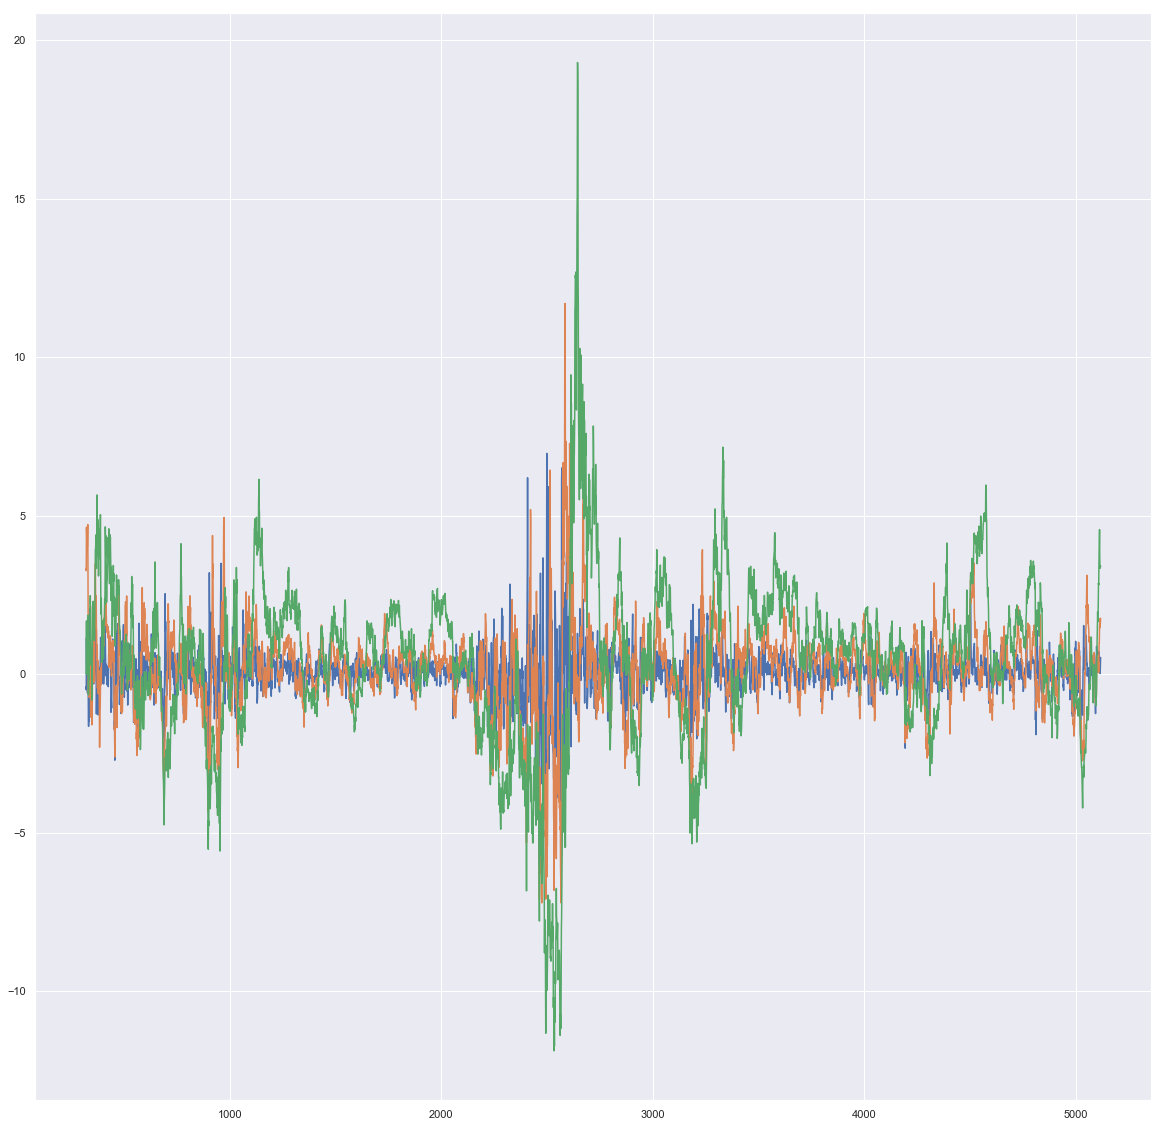

In [3]:
plt.figure(figsize=(20,20))
# plt.plot(df[fld.COL_ADJ_CLOSE])
plt.plot(df['d_5']*20)
plt.plot(df['d_20']*20)
plt.plot(df['d_80']*20)

In [4]:
df['d_80'].describe()

count    4799.000000
mean        0.021352
std         0.128858
min        -0.594032
25%        -0.034933
50%         0.029792
75%         0.087662
max         0.964635
Name: d_80, dtype: float64

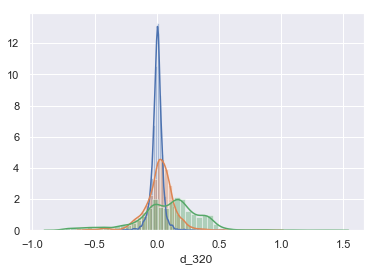

In [6]:
sns.distplot(df['d_10'])
sns.distplot(df['d_80'])
sns.distplot(df['d_320'])